# 02. Neural Network Classification with PyTorch

Online book of course: <https://www.learnpytorch.io/02_pytorch_classification/>

All other Resources: <https://github.com/mrdbourke/pytorch-deep-learning>

Classification = a proflem of predicting whether something is one thing or another (there can be multiple things as the options)

Classification problems is one of the main problems of machine learning

Examples of Classifications
* Binary Classification = One thing or another (1 or 0)
* Multiclass Classification = more than one thing or another
* Multilabel Classification = Multiple label options per sample
* and so on... 

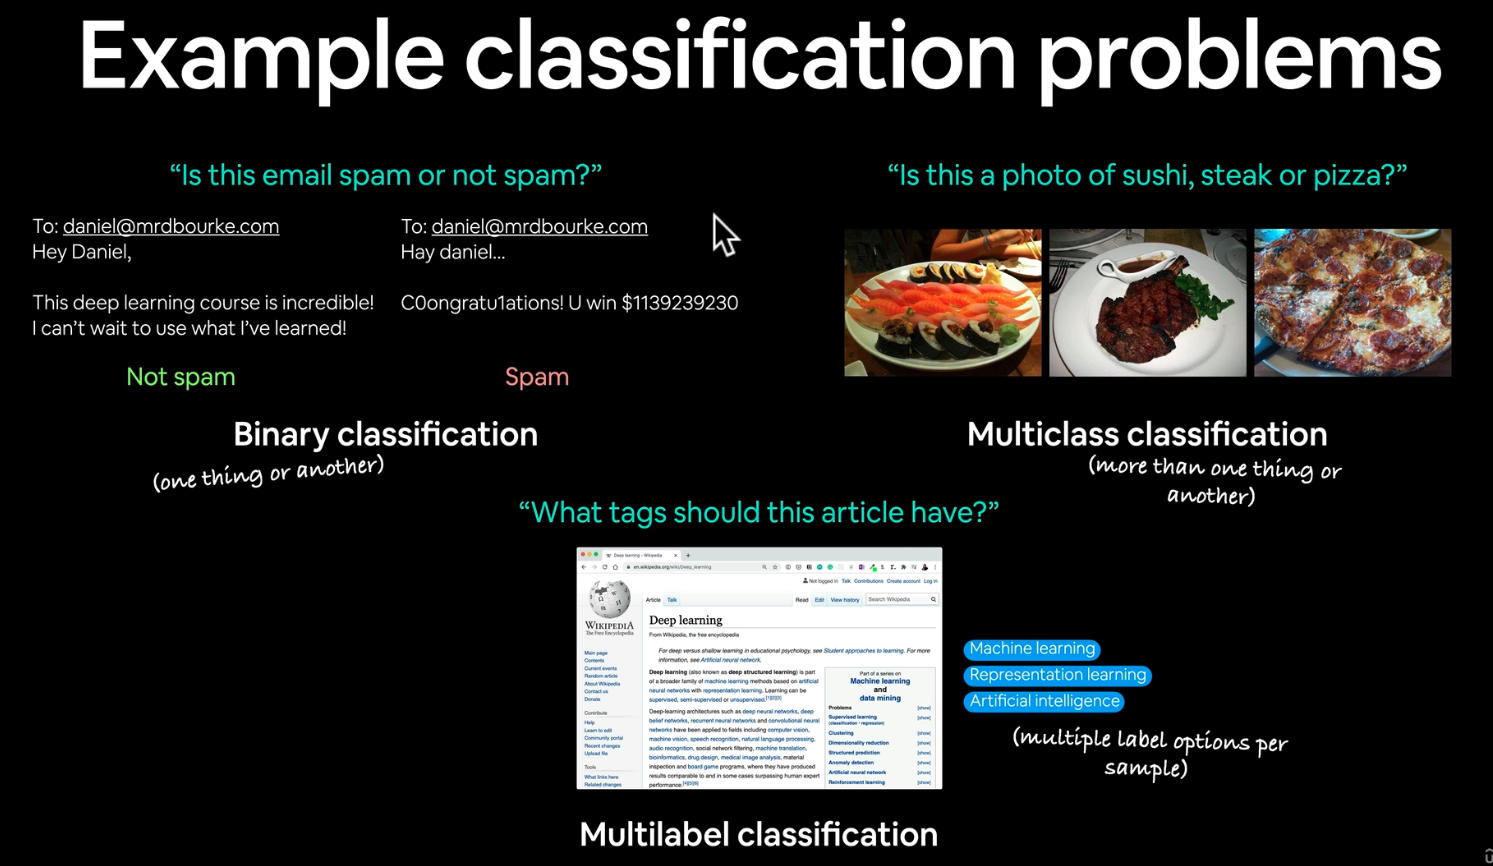

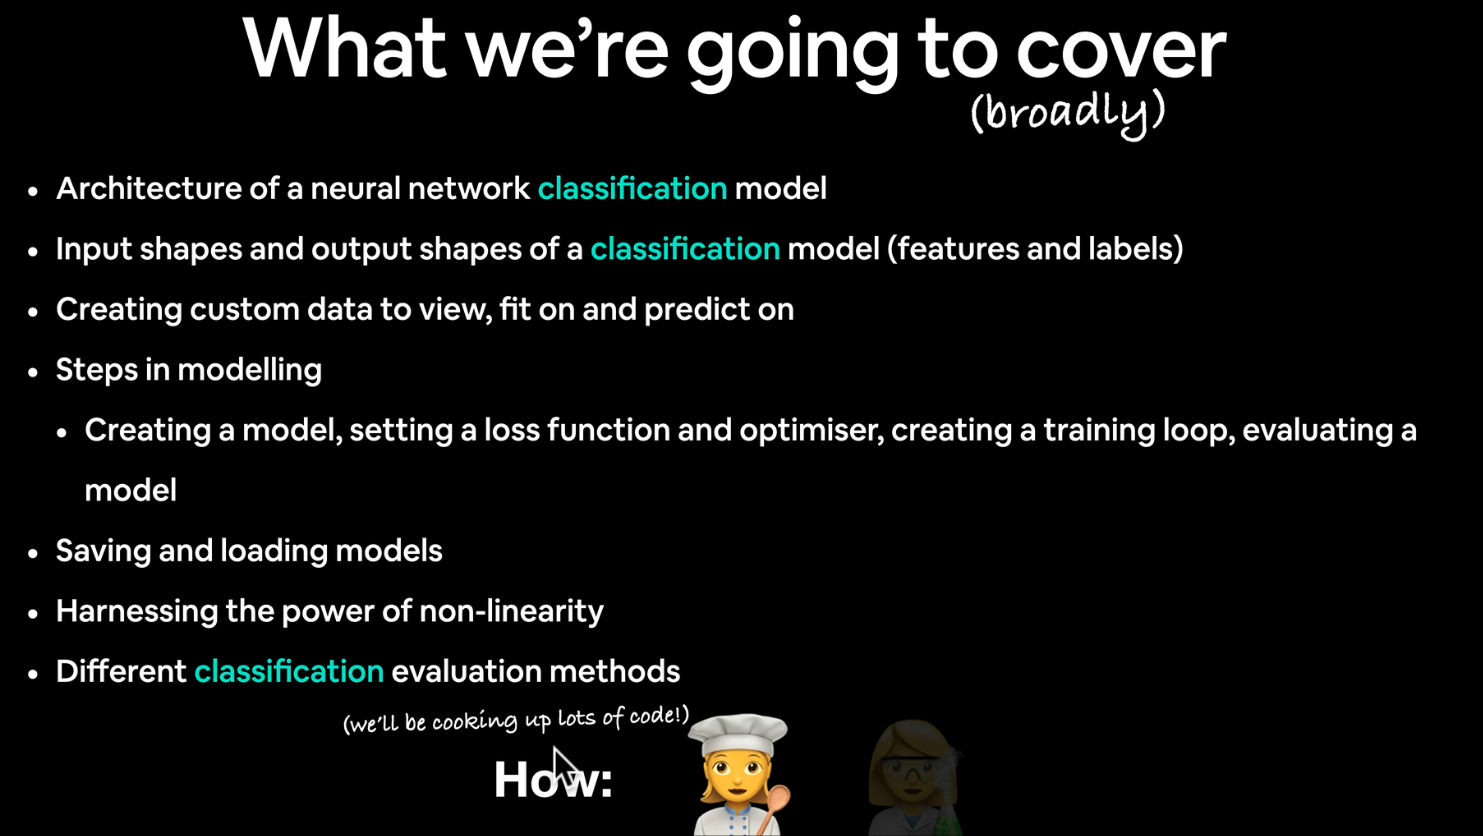


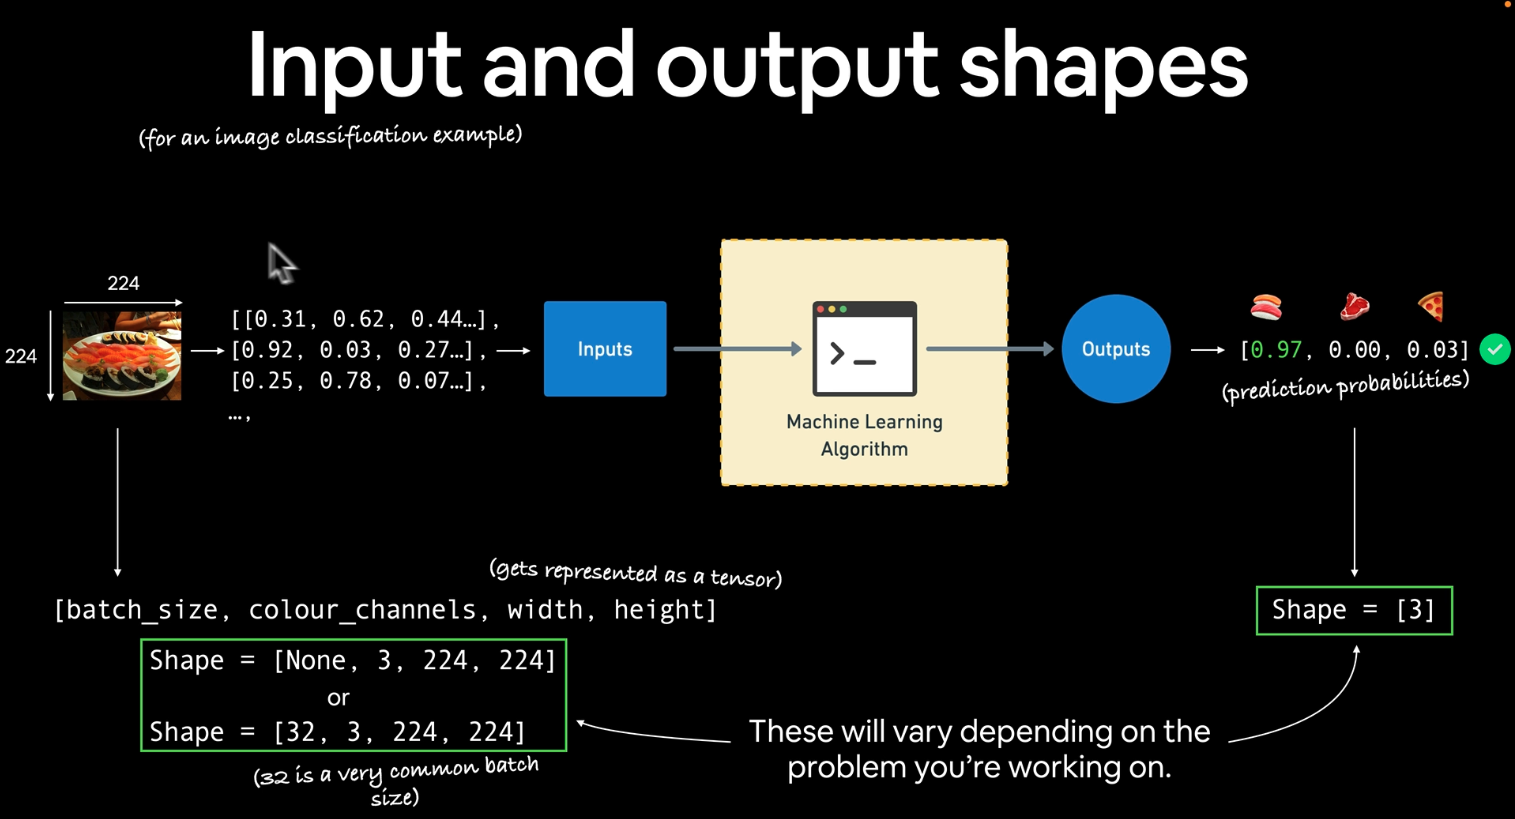

Shapes vary on the problem

Inputs are encoded numerical representation of data

Outputs are the prediction probability per class 

## 0) Overview: Typical Architecture of a Classification Neural Network

Hyperparameter = parameters that we decide the value of

Binary Classification = total number of outputs is 2, one or the other

Multiclass Classification = total number of outputs is 3 or more, more than one thing or another

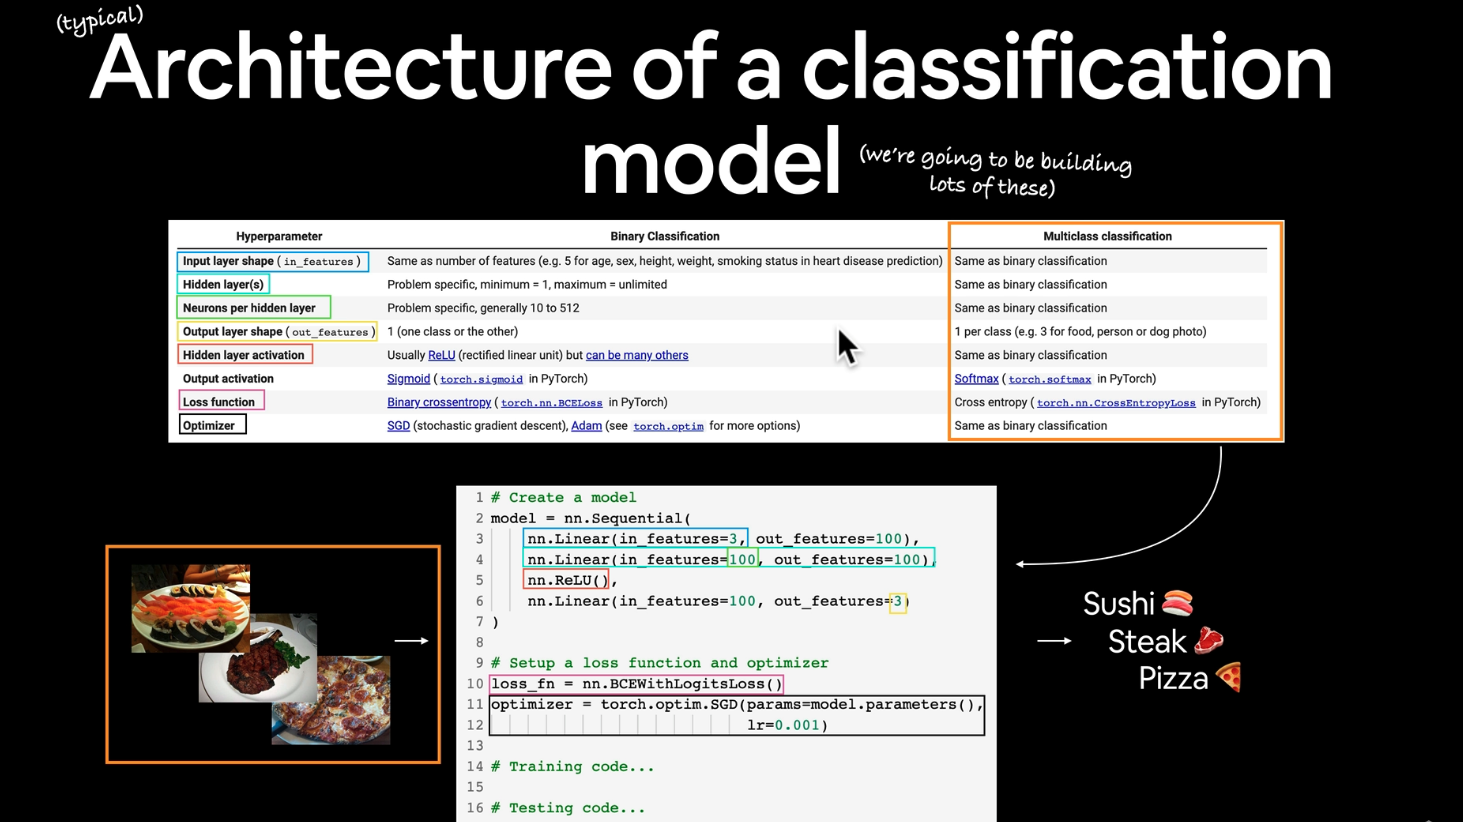

## 1) Make classification data and get it ready

`sklearn` a library for machine learning

<https://scikit-learn.org/stable/datasets/toy_dataset.html>

In Terminal:
        
        conda install scikit-learn

X is for tensors and labels

In [15]:
import sklearn

In [16]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples =1000

# create circles
X, y = make_circles(n_samples, 
                    noise=0.03, # increase randomness
                    random_state=42) # for reproducibility

In [17]:
len(X), len(y)

(1000, 1000)

In [18]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 labels of y:\n{y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 labels of y:
[1 1 1 1 0]


In [19]:
# Make DataFrame of Circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1], 
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


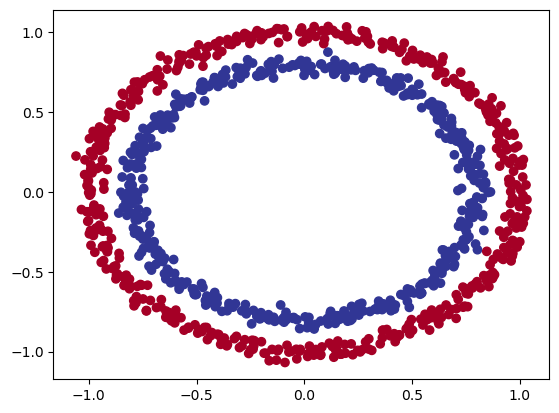

In [20]:
# Visualize, Visualize, Visualize!
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

**Note**: the data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [21]:
X.shape, y.shape

((1000, 2), (1000,))

In [22]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
import torch
torch.__version__

'2.3.1'

In [24]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float) #float is the same as float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [25]:
type(X), torch.float32, torch.float32

(torch.Tensor, torch.float32, torch.float32)

In [26]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

# NOTE: order of X and y is very important
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% of data to test set, 80% to train set
                                                    random_state=42)

In [27]:
print(f"Total samples in our data: {len(X)}")
print(f"Samples in train set: {len(X_train)}")
print(f"Samples in test set: {len(X_test)}")
print("\n")
print(f"Total labels in our data: {len(y)}")
print(f"Labels in train set: {len(y_train)}")
print(f"Labels in test set: {len(y_test)}")

Total samples in our data: 1000
Samples in train set: 800
Samples in test set: 200


Total labels in our data: 1000
Labels in train set: 800
Labels in test set: 200


## 2. Build a model

Let's build a model to classifiy our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [28]:
# import PyTorch and nn
import torch
from torch import nn

# For macbook m1 pro
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'